<a href="https://colab.research.google.com/github/sunatun/atun/blob/main/Copy_of_AIJ0202S2302_C01_Non_Hierarchical_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML-6 Non-Hierarchical Clustering

# Import Library

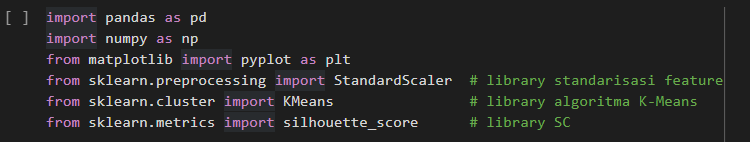

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler  # library standarisasi feature
from sklearn.cluster import KMeans                # library algoritma K-Means
from sklearn.metrics import silhouette_score       # library SC

Menginstal library machine learning visualization: [yellowbrick](https://www.scikit-yb.org/en/latest/).

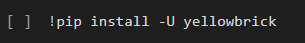

In [2]:
!pip install -U yellowbrick

Import library [KElbowVisualizer](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html).

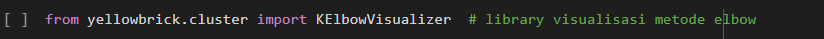

In [3]:
from yellowbrick.cluster import KElbowVisualizer   # library visualisasi metode elbow

# Load Dataset

Download dataset [di sini](https://drive.google.com/file/d/1kQhSkVx2BYYRHeGZtjjfgZTOMSf9YjhY/view?usp=sharing)

Pada hands-on ini, kita masih menggunakan dataset Mall_Customers.csv.

Berbeda dengan materi sebelumnya, kali ini, kita akan lakukan Customer Segmentation menggunakan algoritma K-Means.

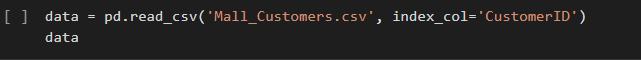

In [4]:
# Load dataset
data = pd.read_csv('/content/Mall_Customers - Mall_Customers (1).csv', index_col='CustomerID')
data

,Gender,Age,AnnualIncome,SpendingScore
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
209,Female,35,1207,79
210,Female,45,126,182
211,Male,32,126,174


Memeriksa kelengkapan dataset.

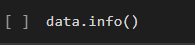

In [5]:
# Periksa informasi terkait dataset (metadata)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240 entries, 1 to 213
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         240 non-null    object
 1   Age            240 non-null    int64 
 2   AnnualIncome   240 non-null    int64 
 3   SpendingScore  240 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 9.4+ KB


Kita hanya memilih dua variable saja, yakni **AnnualIncome** dan **SpendingScore**.

> Note: Jika kita memilih variable Gender, maka kita perlu melakukan preprocessing terlebih dahulu.

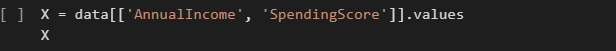

In [6]:
X = data[['AnnualIncome', 'SpendingScore']].values
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

Karena standar besar/kecil di kedua variabel berbeda, maka kita perlu melakukan standarisasi terlebih dahulu menggunakan `StandardScaler`.

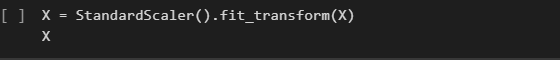

In [8]:
scaler = StandardScaler().fit_transform(X)
X

array([[  15,   39],
       [  15,   81],
       [  16,    6],
       [  16,   77],
       [  17,   40],
       [  17,   76],
       [  18,    6],
       [  18,   94],
       [  19,    3],
       [  19,   72],
       [  19,   14],
       [  19,   99],
       [  20,   15],
       [  20,   77],
       [  20,   13],
       [  20,   79],
       [  21,   35],
       [  21,   66],
       [  23,   29],
       [  23,   98],
       [  24,   35],
       [  24,   73],
       [  25,    5],
       [  25,   73],
       [  28,   14],
       [  28,   82],
       [  28,   32],
       [  28,   61],
       [  29,   31],
       [  29,   87],
       [  30,    4],
       [  30,   73],
       [  33,    4],
       [  33,   92],
       [  33,   14],
       [  33,   81],
       [  34,   17],
       [  34,   73],
       [  37,   26],
       [  37,   75],
       [  38,   35],
       [  38,   92],
       [  39,   36],
       [  39,   61],
       [  39,   28],
       [  39,   65],
       [  40,   55],
       [  40,

# Metode Elbow

Sebelum men-training model K-Means, sebaiknya kita mencari nilai K yang paling baik/optimal terlebih dahulu.

Nilai ini bisa kita cari menggunakan Metode Elbow atau `KElbowVisualizer` pada Python.



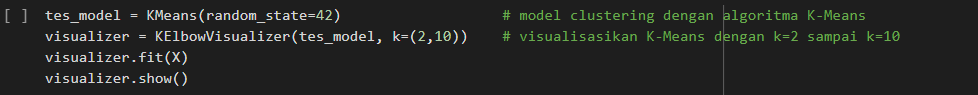

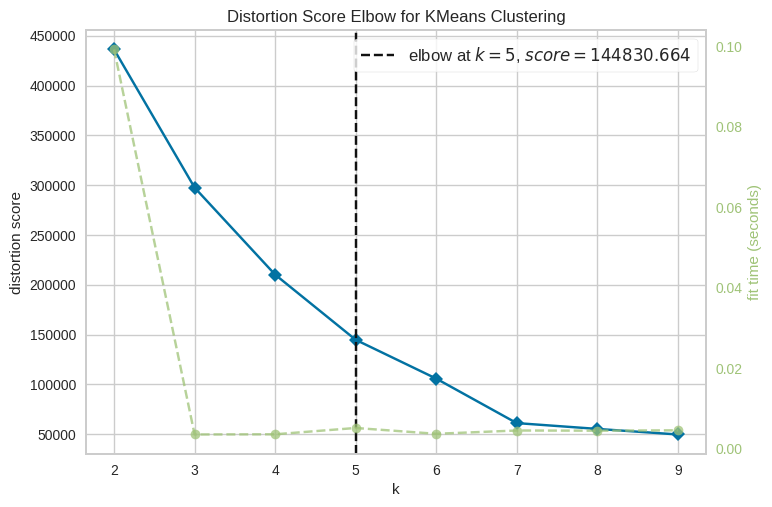

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# Inisiasi model KMeans
tes_model = KMeans(random_state=42)  # model clustering dengan algoritma K-Means

# Inisiasi KElbowVisualizer
visualizer = KElbowVisualizer(tes_model, k=(2, 10))  # visulisasikan K-Means dengan k=2 sampai k=10

# Fit visualizer
visualizer.fit(X)
visualizer.show()

Berdasarkan hasil Metode Elbow, Titik Elbow berada pada K=5.

Maka nilai K terbaik/optimal adalah 5.

# Modeling

Selanjutnya kita lakukan training model menggunakan algoritma K-Means dengan:
- cluster bejumlah 5 (K=5)
- random state bernilai 42

Random state berguna untuk mengontrol ke-random-an inisiasi centroid.


Kita juga bisa men-tuning hyperparameter K-Means lainnya. Baca dokumentasi lengkapnya [di sini](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

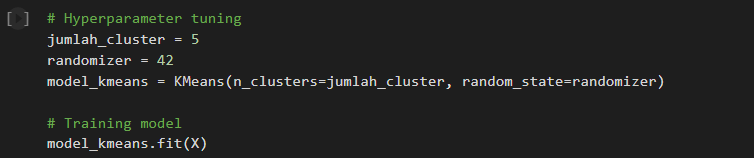

In [10]:
# Hyperparameter tuning
jumlah_cluster = 5
randomizer = 42
model_kmeans = KMeans(n_clusters=jumlah_cluster, random_state=randomizer)

# Training model
model_kmeans.fit(X)

KMeans(n_clusters=5, random_state=42)

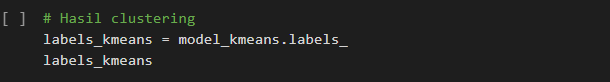

In [11]:
# Hasil clustering
labels_kmeans = model_kmeans.labels_
labels_kmeans

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 3, 0, 3, 0, 3, 1, 1, 1, 1, 3, 3, 3, 3],
      dtype=int32)

Karena kita menentukan K=5 (cluster berjumlah 5), maka kita akan mendapat 5 centroid.

Informasi (letak) tiap centroid bisa kita akses menggunakan method `cluster_centers_`.

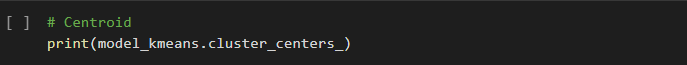

In [13]:
# Centroid
print(model_kmeans.cluster_centers_)

[[  87.29268293   19.2195122 ]
 [1167.           48.5       ]
 [  45.75         59.11607143]
 [  91.47826087   90.34782609]
 [  27.24324324   20.94594595]]


# Evaluasi Model

Ada beberapa metode yang bisa kita gunakan untuk mengevaluasi model clustering, antara lain:
1. Melihat dendrogram
2. Metode elbow
3. Visualisasi data
4. Silhouette Coefficient (SC)

Dendrogram digunakan pada model AHC.
Sedangkan, metode elbow sudah kita gunakan untuk menentukan nilai K terbaik.

Selanjutnya, kita akan mengevaluasi model clustering menggunakan visualisasi data dan SC.

## Visualisasi Hasil Clustering (Visualisasi Data)

Kita bisa memvisualisasikan hasil clustering dan centroid secara bersamaan menggunaan scatter plot.

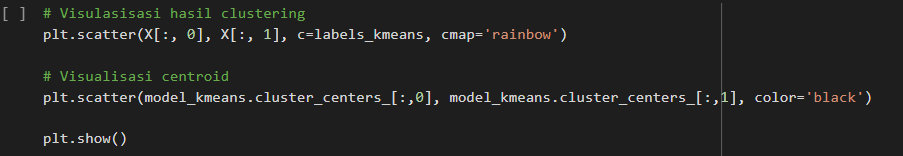

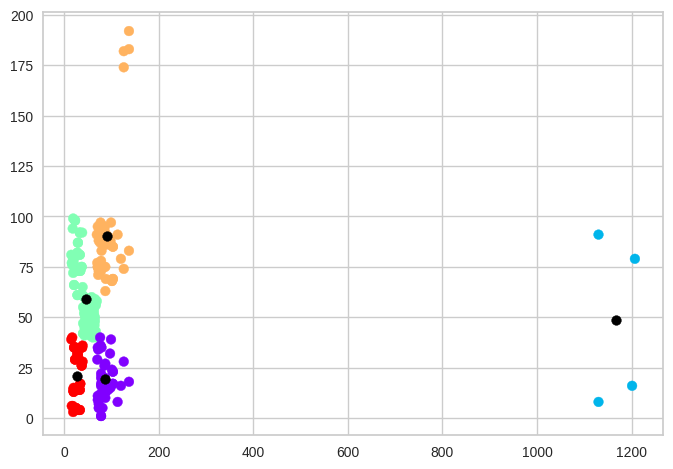

In [14]:
# Visualisasi hasil clustering
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans, cmap='rainbow')

# Visualisasi centroid
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], color='black')

plt.show()

Terlihat hasil clustering sudah cukup bagus.

---

**Note**:
- Kita bisa memvisualisasikan dataset secara 2D karena dataset tersebut hanya terdiri dari dua variable/feature, yakni **AnnualIncome** dan **SpendingScore**.
- Jika dataset kita terdiri dari tiga variable, maka kita masih bisa memvisualisasikan dataset secara 3D.
- Namun, kita tidak akan bisa memvisualisasikan dataset dengan jumlah variable lebih dari tiga, karena visualisasinya lebih dari 3D.
- Salah satu solusi visualisasi dataset dengan jumlah variable >3 adalah reduksi dimensi (dimensionality reduction).

Materi dimensionality reduction akan kita pelajari pada domain Data Science.

## Silhouette Coefficient

Kita bisa menggunakan `silhouette_score` untuk mendapat Silhouette Score model yang telah kita training.

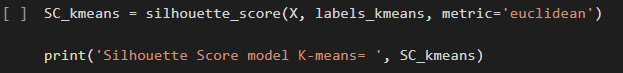

In [15]:
SC_kmeans = silhouette_score(X, labels_kmeans, metric='euclidean')

print('Silhouette Score model K-means= ', SC_kmeans)

Silhouette Score model K-means=  0.47241387889324893


Semakin Silhouette Score mendekati 1, maka model clustering akan semakin bagus.

Berdasarkan Silhouette Score, model K-Means yang telah kita training sudah cukup bagus.

Alangkah baiknya jika kita men-training lebih dari satu model clustering dengan berbagai algoritma dan tuning hyperparameter.

Kemudian, kita bandingkan Silhouette Score tiap model untuk mengetahui mana model terbagus.

# Kesimpulan

Simpan hasil clustering ke dalam dataset.

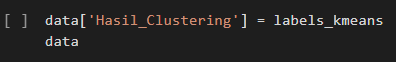

In [16]:
data['Hasil_Clustering'] = labels_kmeans
data

,Gender,Age,AnnualIncome,SpendingScore,Hasil_Clustering
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4
...,...,...,...,...,...
209,Female,35,1207,79,1
210,Female,45,126,182,3
211,Male,32,126,174,3


**Contoh**:

Menghitung rata-rata tiap cluster untuk menarik kesimpulan.

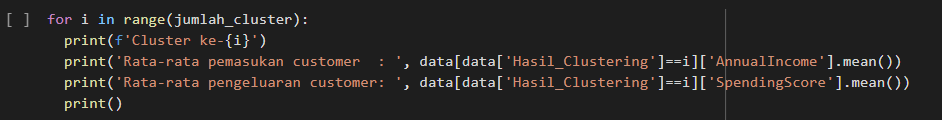

In [17]:
for i in range(jumlah_cluster):
    print(f'Cluster ke-{i}')
    print('Rata-rata pemasukan customer : ', data[data['Hasil_Clustering'] == i]['AnnualIncome'].mean())
    print('Rata-rata pengeluaran customer : ', data[data['Hasil_Clustering'] == i]['SpendingScore'].mean())
    print()

Cluster ke-0
Rata-rata pemasukan customer :  87.8
Rata-rata pengeluaran customer :  18.7

Cluster ke-1
Rata-rata pemasukan customer :  1167.0
Rata-rata pengeluaran customer :  48.5

Cluster ke-2
Rata-rata pemasukan customer :  45.93805309734513
Rata-rata pengeluaran customer :  58.94690265486726

Cluster ke-3
Rata-rata pemasukan customer :  91.47826086956522
Rata-rata pengeluaran customer :  90.34782608695652

Cluster ke-4
Rata-rata pemasukan customer :  27.243243243243242
Rata-rata pengeluaran customer :  20.945945945945947



Bisa kita simpulkan bahwa :    
- Cluster 0 adalah kelompok customer menengah ke bawah yang hemat (pengeluarannya sangat kecil)
- Cluster 1 adalah kelompok customer menengah ke bawah yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 2 adalah kelompok customer tingkat atas yang hemat (pengeluarannya sangat kecil)
- Cluster 3 adalah kelompok customer menengah ke atas yang sangat boros (pengeluaran lebih besar dari pemasukan)
- Cluster 4 adalah kelompok customer menengah ke bawah yang boros (pengeluaran hampir sama dengan pemasukan)

---

**OPEN DISCUSSION**

Jika kamu adalah pemilik toko kredit dan akan menawarkan kredit mobil, cluster manakah yang menurutmu tepat?



# Exercise (Latihan)

Boleh pilih salah satu activity atau lakukan keduanya.

## Activity 1

- Gunakan dataset Mall_Customers.csv
- Gunakan variable Age, AnnualIncome, dan SpendingScore
- Lakukan clustering menggunakan model AHC dan K-Means
- Tentukan nilai K terbaik untuk setiap model
- Bandingkan SC model K-Means dengan AHC
- Tarik kesimpulan activity dan paparkan mana model terbaik

## Activity 2

1. Buat kelompok
2. Carilah dataset untuk kasus clustering di sekitarmu atau di internet
3. Lakukan clustering menggunakan algortima K-Means (ikuti step pada hands-on ini)
4. Buat kesimpulan clustering
5. Kumpulkan ke HC